# RoBERT vs XGBoost vs SVM Comparison

This notebook compares the performance of three sentiment analysis models on the LaRoSeDa dataset:
1. **RoBERT** (Romanian BERT) - Transformer-based model (v1)
2. **XGBoost** - Gradient boosting with IGWO feature selection, no stemming
3. **SVM** - Support Vector Machine with full TF-IDF features, no IGWO, no stemming

## Comparison Aspects
- Accuracy and other metrics
- Confusion matrices
- Per-class performance
- Model characteristics
- Speed and deployment considerations

In [1]:
import sys
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

%matplotlib inline

## 1. Load Results

Load metrics from all three models.

In [2]:
# Define experiment paths
robert_dir = Path("../../ml-models/robert/v1")
xgboost_dir = Path("../results/experiments/xgb_igwo_and_no_stemmatization")
svm_dir = Path("../results/experiments/svm_no_igwo_no_stemmmatization")

print(f"RoBERT experiment: {robert_dir}")
print(f"XGBoost experiment: {xgboost_dir}")
print(f"SVM experiment: {svm_dir}")

RoBERT experiment: ..\..\ml-models\robert\v1
XGBoost experiment: ..\results\experiments\xgb_igwo_and_no_stemmatization
SVM experiment: ..\results\experiments\svm_no_igwo_no_stemmmatization


In [3]:
# Load metrics
models = {}

if robert_dir.exists() and (robert_dir / 'metrics.json').exists():
    with open(robert_dir / 'metrics.json') as f:
        models['RoBERT'] = json.load(f)
    print("✓ Loaded RoBERT metrics")
else:
    print("✗ RoBERT metrics not found")
    models['RoBERT'] = None

if xgboost_dir.exists() and (xgboost_dir / 'metrics.json').exists():
    with open(xgboost_dir / 'metrics.json') as f:
        models['XGBoost'] = json.load(f)
    print("✓ Loaded XGBoost metrics")
else:
    print("✗ XGBoost metrics not found")
    models['XGBoost'] = None

if svm_dir.exists() and (svm_dir / 'metrics.json').exists():
    with open(svm_dir / 'metrics.json') as f:
        models['SVM'] = json.load(f)
    print("✓ Loaded SVM metrics")
else:
    print("✗ SVM metrics not found")
    models['SVM'] = None

✓ Loaded RoBERT metrics
✓ Loaded XGBoost metrics
✓ Loaded SVM metrics


## 2. Metrics Comparison

Compare key performance metrics between all three models.

In [4]:
# Create comparison dataframe
if all(models.values()):
    comparison_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
        'RoBERT': [
            models['RoBERT'].get('accuracy', 0),
            models['RoBERT'].get('precision_macro', 0),
            models['RoBERT'].get('recall_macro', 0),
            models['RoBERT'].get('f1_macro', 0)
        ],
        'XGBoost': [
            models['XGBoost'].get('accuracy', 0),
            models['XGBoost'].get('precision_macro', 0),
            models['XGBoost'].get('recall_macro', 0),
            models['XGBoost'].get('f1_macro', 0)
        ],
        'SVM': [
            models['SVM'].get('accuracy', 0),
            models['SVM'].get('precision_macro', 0),
            models['SVM'].get('recall_macro', 0),
            models['SVM'].get('f1_macro', 0)
        ]
    })
    
    print("\n📊 METRICS COMPARISON")
    print("=" * 100)
    print(comparison_df.to_string(index=False))
    print("=" * 100)
    
    # Highlight winner for each metric
    for idx, row in comparison_df.iterrows():
        metric = row['Metric']
        scores = {'RoBERT': row['RoBERT'], 'XGBoost': row['XGBoost'], 'SVM': row['SVM']}
        winner = max(scores, key=scores.get)
        print(f"\n🏆 {metric}: {winner} wins with {scores[winner]:.4f}")
else:
    print("⚠ Cannot compare - missing metrics")


📊 METRICS COMPARISON
           Metric   RoBERT  XGBoost      SVM
         Accuracy 0.983333 0.946667 0.952333
Precision (Macro) 0.983337 0.946717 0.952367
   Recall (Macro) 0.983333 0.946667 0.952333
 F1 Score (Macro) 0.983333 0.946665 0.952332

🏆 Accuracy: RoBERT wins with 0.9833

🏆 Precision (Macro): RoBERT wins with 0.9833

🏆 Recall (Macro): RoBERT wins with 0.9833

🏆 F1 Score (Macro): RoBERT wins with 0.9833


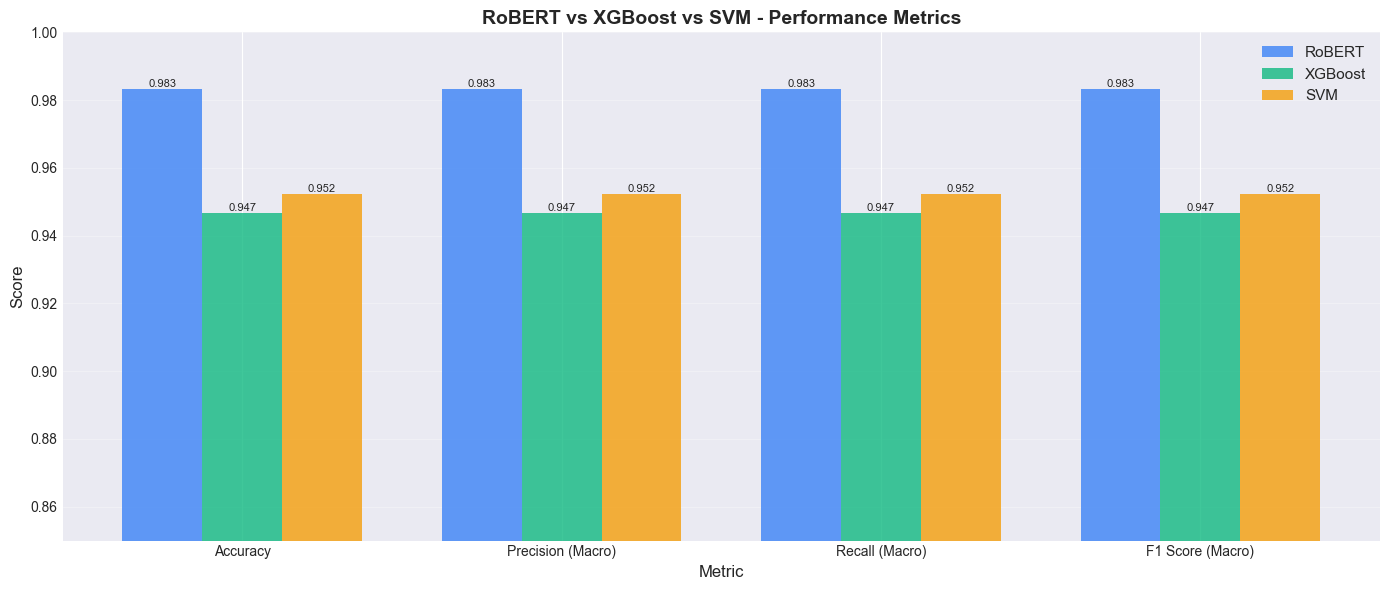

In [5]:
# Visualize metrics comparison
if all(models.values()):
    fig, ax = plt.subplots(figsize=(14, 6))
    
    x = np.arange(len(comparison_df))
    width = 0.25
    
    bars1 = ax.bar(x - width, comparison_df['RoBERT'], width, label='RoBERT', alpha=0.8, color='#3b82f6')
    bars2 = ax.bar(x, comparison_df['XGBoost'], width, label='XGBoost', alpha=0.8, color='#10b981')
    bars3 = ax.bar(x + width, comparison_df['SVM'], width, label='SVM', alpha=0.8, color='#f59e0b')
    
    ax.set_xlabel('Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title('RoBERT vs XGBoost vs SVM - Performance Metrics', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Metric'])
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0.85, 1.0])
    
    # Add value labels on bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

## 3. Confusion Matrix Comparison

Visualize confusion matrices for all three models.

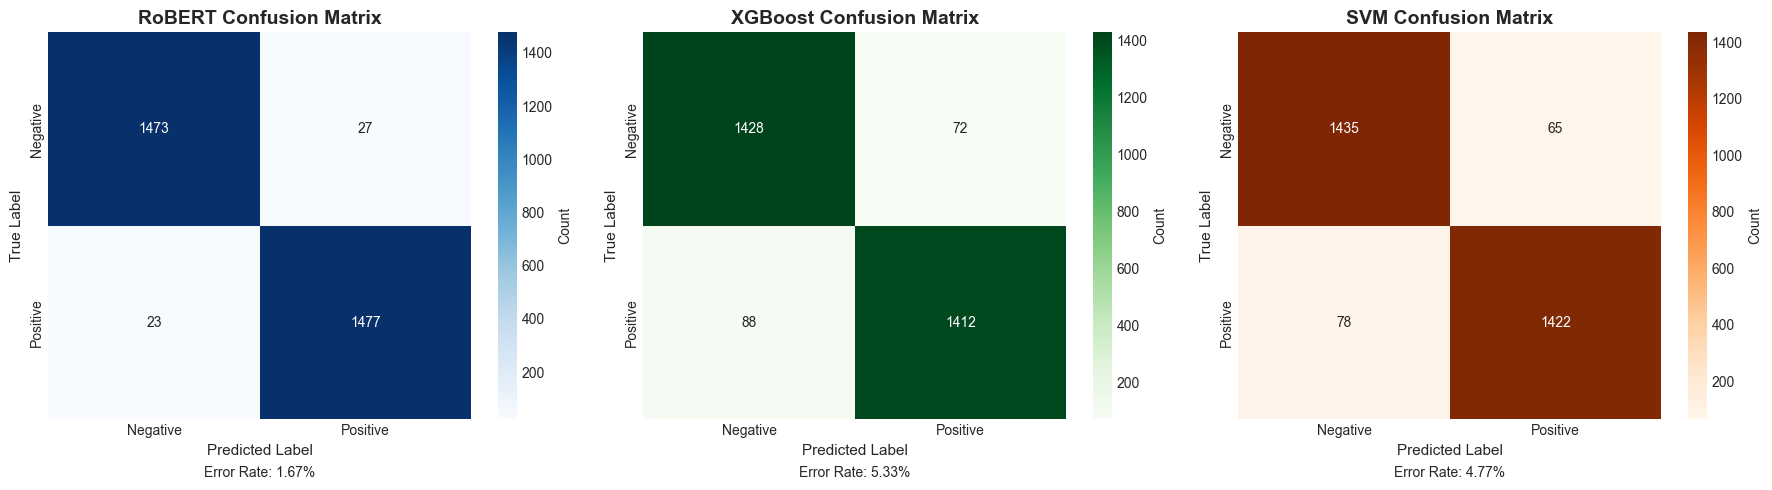

In [6]:
# Plot confusion matrices side by side
if all(models.values()):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    class_names = ['Negative', 'Positive']
    colors = ['Blues', 'Greens', 'Oranges']
    
    for idx, (model_name, color) in enumerate(zip(['RoBERT', 'XGBoost', 'SVM'], colors)):
        cm = np.array(models[model_name].get('confusion_matrix', [[0, 0], [0, 0]]))
        sns.heatmap(cm, annot=True, fmt='d', cmap=color,
                    xticklabels=class_names, yticklabels=class_names,
                    ax=axes[idx], cbar_kws={'label': 'Count'})
        axes[idx].set_title(f'{model_name} Confusion Matrix', fontsize=14, fontweight='bold')
        axes[idx].set_ylabel('True Label', fontsize=11)
        axes[idx].set_xlabel('Predicted Label', fontsize=11)
        
        # Add error rate
        error_rate = (cm[0, 1] + cm[1, 0]) / cm.sum()
        axes[idx].text(0.5, -0.15, f'Error Rate: {error_rate:.2%}',
                      ha='center', transform=axes[idx].transAxes, fontsize=10)
    
    plt.tight_layout()
    plt.show()

## 5. Model Characteristics Comparison

Compare model architecture, size, and computational requirements.

In [8]:
# Create characteristics comparison
characteristics = pd.DataFrame({
    'Characteristic': [
        'Model Type',
        'Parameters',
        'Preprocessing',
        'Feature Engineering',
        'Feature Selection',
        'Training Time (approx)',
        'Inference Speed',
        'Model Size',
        'GPU Required',
        'Language Specific'
    ],
    'RoBERT': [
        'Transformer (BERT)',
        '~124M parameters',
        'Minimal (tokenization)',
        'Automatic (learned embeddings)',
        'N/A',
        '1-3 hours',
        '~20ms per review',
        '~500MB',
        'Recommended',
        'Yes (Romanian BERT)'
    ],
    'XGBoost': [
        'Gradient Boosting',
        '~1M parameters',
        'Extensive (lemmatization)',
        'Manual (TF-IDF)',
        'IGWO (1000 features)',
        '20-40 minutes',
        '~5ms per review',
        '~15MB',
        'No',
        'Language-agnostic'
    ],
    'SVM': [
        'Support Vector Machine',
        '~5K parameters',
        'Extensive (lemmatization)',
        'Manual (TF-IDF)',
        'None (5089 features)',
        '<5 minutes',
        '<1ms per review',
        '~10MB',
        'No',
        'Language-agnostic'
    ]
})

print("\n⚙️ MODEL CHARACTERISTICS COMPARISON")
print("=" * 120)
print(characteristics.to_string(index=False))
print("=" * 120)


⚙️ MODEL CHARACTERISTICS COMPARISON
        Characteristic                         RoBERT                   XGBoost                       SVM
            Model Type             Transformer (BERT)         Gradient Boosting    Support Vector Machine
            Parameters               ~124M parameters            ~1M parameters            ~5K parameters
         Preprocessing         Minimal (tokenization) Extensive (lemmatization) Extensive (lemmatization)
   Feature Engineering Automatic (learned embeddings)           Manual (TF-IDF)           Manual (TF-IDF)
     Feature Selection                            N/A      IGWO (1000 features)      None (5089 features)
Training Time (approx)                      1-3 hours             20-40 minutes                <5 minutes
       Inference Speed               ~20ms per review           ~5ms per review           <1ms per review
            Model Size                         ~500MB                     ~15MB                     ~10MB
         

## 7. Summary and Recommendations

Provide final recommendations based on the comparison.

In [11]:
if all(models.values()):
    accuracies = {
        'RoBERT': models['RoBERT']['accuracy'],
        'XGBoost': models['XGBoost']['accuracy'],
        'SVM': models['SVM']['accuracy']
    }
    
    best_model = max(accuracies, key=accuracies.get)
    
    print("\n" + "="*100)
    print("📝 SUMMARY AND RECOMMENDATIONS")
    print("="*100)
    
    print(f"\n📊 Final Accuracy Scores:")
    for model, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
        winner_mark = "🏆" if model == best_model else "  "
        print(f"  {winner_mark} {model:10s}: {acc:.4f} ({acc*100:.2f}%)")
    
    print("\n" + "="*100)
    print("📈 KEY FINDINGS")
    print("="*100)
    
    # Compare models pairwise
    robert_vs_xgb = accuracies['RoBERT'] - accuracies['XGBoost']
    robert_vs_svm = accuracies['RoBERT'] - accuracies['SVM']
    xgb_vs_svm = accuracies['XGBoost'] - accuracies['SVM']
    
    print(f"\n1. RoBERT vs XGBoost: {robert_vs_xgb:+.2%} accuracy difference")
    print(f"2. RoBERT vs SVM: {robert_vs_svm:+.2%} accuracy difference")
    print(f"3. XGBoost vs SVM: {xgb_vs_svm:+.2%} accuracy difference")
    
    print("\n" + "="*100)
    print("💡 USE CASE RECOMMENDATIONS")
    print("="*100)
    
    print("\n✅ Use RoBERT when:")
    print("  • Maximum accuracy is critical ")
    print("  • GPU resources available for inference")
    print("  • Romanian language nuances are important")
    print("  • Inference latency <50ms is acceptable")
    print("  • Budget allows for higher compute costs")
    
    print("\n✅ Use XGBoost when:")
    print("  • Good balance of accuracy and speed needed")
    print("  • GPU not available or too expensive")
    print("  • Moderate model size acceptable (~15MB)")
    
    print("\n✅ Use SVM when:")
    print("  • Ultra-fast inference critical (<1ms)")
    print("  • Minimal resource footprint required")
    print("  • Simplest deployment preferred")
    print("  • Baseline model for comparison")
    
    
else:
    print("⚠ Cannot provide recommendations - missing metrics")


📝 SUMMARY AND RECOMMENDATIONS

📊 Final Accuracy Scores:
  🏆 RoBERT    : 0.9833 (98.33%)
     SVM       : 0.9523 (95.23%)
     XGBoost   : 0.9467 (94.67%)

📈 KEY FINDINGS

1. RoBERT vs XGBoost: +3.67% accuracy difference
2. RoBERT vs SVM: +3.10% accuracy difference
3. XGBoost vs SVM: -0.57% accuracy difference

💡 USE CASE RECOMMENDATIONS

✅ Use RoBERT when:
  • Maximum accuracy is critical 
  • GPU resources available for inference
  • Romanian language nuances are important
  • Inference latency <50ms is acceptable
  • Budget allows for higher compute costs

✅ Use XGBoost when:
  • Good balance of accuracy and speed needed
  • GPU not available or too expensive
  • Moderate model size acceptable (~15MB)

✅ Use SVM when:
  • Ultra-fast inference critical (<1ms)
  • Minimal resource footprint required
  • Simplest deployment preferred
  • Baseline model for comparison
